In [85]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import preprocessing
from sklearn.decomposition import PCA


In [86]:
%matplotlib inline

In [160]:
df = pd.read_csv("cereals.csv", na_values = -1).dropna()

In [161]:
df.head(1)
#df.set_index("name").head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33


In [171]:
pca = PCA(n_components =2)
pca.fit(df.iloc[:, 3:])
reduced_x = pca.transform(df.iloc[:, 3:])

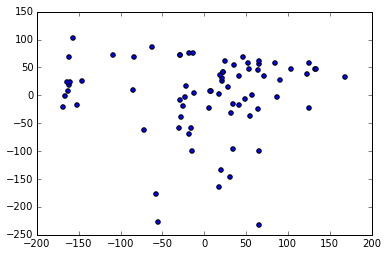

In [172]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1])

In [173]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)
y_pred = kmeans.fit_predict(reduced_x)

In [188]:
zip_list = list(zip(reduced_x, y_pred))

####I used 3, 4, 5, and 6 clusters but 4 looked like the most natural groupings to my eye.

#####Once, just for fun I plugged in 8 and I was supprised at how natural the groupings still looked.  This is an interesting tool.

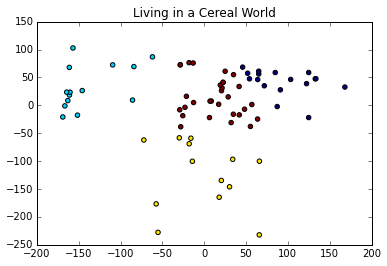

In [175]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=y_pred, )
plt.title("Living in a Cereal World")
plt.show()

In [181]:
#holding_my_breath_ = pd.merge(df, y_pred)
#nope

In [178]:
#y_pred

In [195]:
zip_ = pd.DataFrame(zip_list)
zip_.head(2)

,0,1
0,"[-57.4496324545, -176.677344529]",2
1,"[-151.460814312, -17.6971815882]",1


In [206]:
df.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00


####I got close here, but there are 3 missing rows of data on the 

In [204]:
df.join(zip_).tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,0,1
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,"[34.771261507, -15.9815163707]",3
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1.00,"[41.6433268933, 33.7346868995]",3
74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,NaN,NaN
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1.00,NaN,NaN
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75,NaN,NaN


####Data, why you no match?
